In [1]:
import pandas as pd
import numpy as np
import random
from collections import deque

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.pandas.read_csv('grades.csv')
data = data.drop(columns=[data.columns[0], 'genre'], axis=1)

X = data.drop('liked', axis=1)
y = data['liked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

1.0
0.8


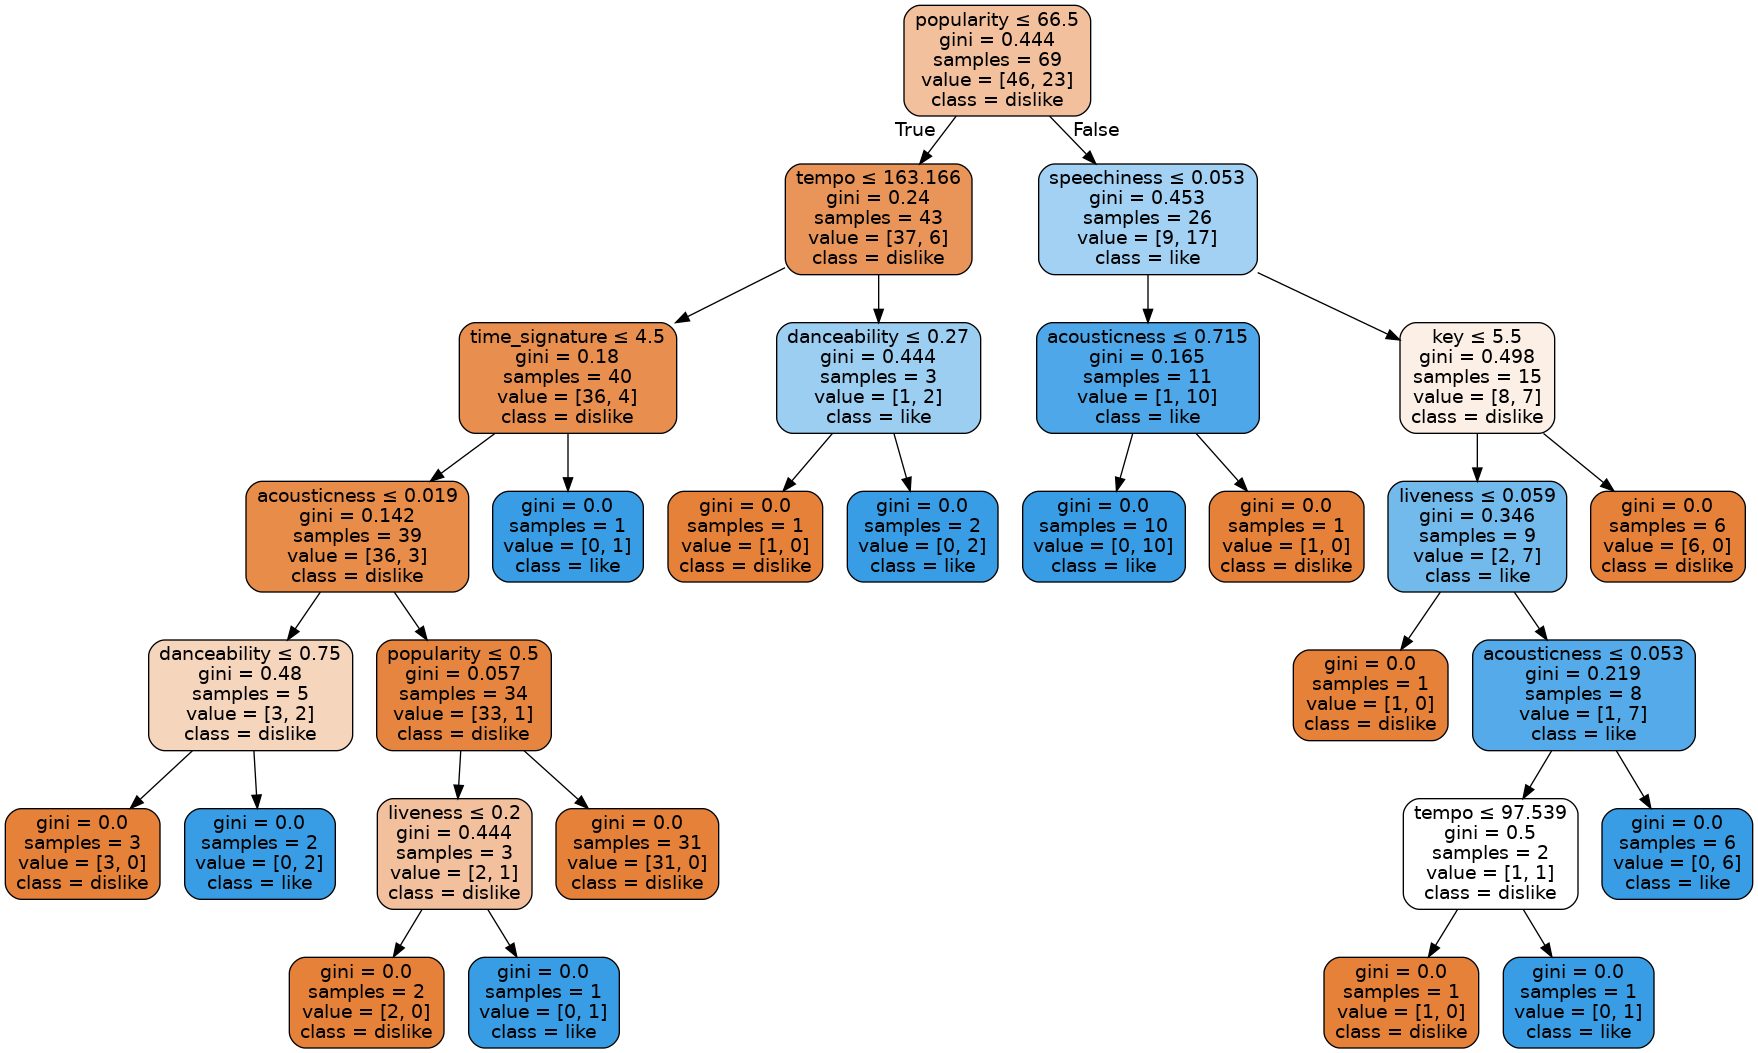

In [11]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True,
               special_characters=True, feature_names=list(X.columns), class_names=['dislike', 'like'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [16]:
lrm = LogisticRegression(solver='lbfgs')
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)

print(lrm.score(X_train, y_train))
print(lrm.score(X_test, y_test))

0.782608695652174
0.7333333333333333
